# First Assignment | Diet Recommendation System | Group 6

Instructions:
 - Develop a content-based recommendation system using python program.
 - Apply Cosine Similarity and Jaccard Similarity.

Dataset:
 - The dataset to be used in this assignment will be the [Emoji Diet Nutritional Data](https://www.kaggle.com/ofrancisco/emoji-diet-nutritional-data-sr28?select=Personal+DRI.csv) from kaggle.

About:
 - The assignment will be a diet recommendation system that would help the user with their diet by asking input from the user of the amount of calories, carbohydrates, sugars, proteins, fat, vitamins, and minerals.


## Group 6 Members:
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda
 - Randall Joseph Pajaro

## Calorie Intake Recommendations

Import dataset + essential libraries for viewing the dataset

In [1]:
import pandas as pd
import sklearn.metrics.pairwise as pw
from scipy import sparse

In [2]:
df = pd.read_csv('USDA_National_Nutrient_DB.csv')
df.head()

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,16116,Legumes and Legume Products,"Soy flour, full-fat, roasted",441.0,34.80,21.86,33.67,7.61,9.7,6.0,...,0.5675,0.205375,0.723846,0.343333,0.156667,0.002468,0.878571,0.680000,0.136364,0.325455
1,18316,Baked Products,"Pie, coconut custard, commercially prepared",260.0,5.90,13.20,30.20,0.00,1.8,26.0,...,0.0475,0.025188,0.113846,0.073333,0.067500,0.000070,0.042857,0.174286,0.116364,0.061818
2,15261,Finfish and Shellfish Products,"Fish, tilapia, raw",96.0,20.08,1.70,0.00,0.00,0.0,0.0,...,0.0600,0.243938,0.048462,0.034167,0.008333,0.000083,0.064286,0.242857,0.760000,0.030000
3,8417,Breakfast Cereals,"Cereals, QUAKER, Instant Oatmeal, Banana Bread...",368.0,8.97,4.85,75.70,29.45,6.7,0.0,...,0.0000,0.706875,0.769231,0.816667,0.230833,0.000000,0.219048,0.450000,0.000000,0.188182
4,20022,Cereal Grains and Pasta,"Cornmeal, degermed, enriched, yellow",370.0,7.11,1.75,79.45,1.61,3.9,11.0,...,0.8375,0.310500,0.293846,0.459167,0.002500,0.000084,0.076190,0.141429,0.190909,0.060000


In [3]:
df.columns

Index(['ID', 'FoodGroup', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg',
       'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg',
       'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

Calculating the total mean calories in each food group

In [4]:
df.groupby('FoodGroup')['Energy_kcal'].mean().sort_values(ascending=False)

FoodGroup
Fats and Oils                          647.733728
Nut and Seed Products                  501.443396
Snacks                                 441.713235
Baked Products                         392.821705
Breakfast Cereals                      344.837838
Sweets                                 328.718519
Cereal Grains and Pasta                277.402685
Spices and Herbs                       249.489796
Fast Foods                             248.962329
Sausages and Luncheon Meats            242.424242
Dairy and Egg Products                 230.857143
Lamb, Veal, and Game Products          215.052632
Pork Products                          214.722628
Beef Products                          211.602362
Restaurant Foods                       210.864198
American Indian/Alaska Native Foods    204.958678
Legumes and Legume Products            202.386885
Poultry Products                       196.188498
Meals, Entrees, and Side Dishes        175.915789
Baby Foods                             1

Calculating the total calories in each food group

In [5]:
df.groupby('FoodGroup')['Energy_kcal'].count().sort_values(ascending=False)

FoodGroup
Beef Products                          762
Vegetables and Vegetable Products      658
Baked Products                         645
Soups, Sauces, and Gravies             358
Lamb, Veal, and Game Products          342
Poultry Products                       313
Baby Foods                             311
Legumes and Legume Products            305
Breakfast Cereals                      296
Fast Foods                             292
Fruits and Fruit Juices                291
Pork Products                          274
Sweets                                 270
Beverages                              249
Finfish and Shellfish Products         221
Dairy and Egg Products                 203
Sausages and Luncheon Meats            198
Fats and Oils                          169
Cereal Grains and Pasta                149
Snacks                                 136
American Indian/Alaska Native Foods    121
Nut and Seed Products                  106
Meals, Entrees, and Side Dishes         95
R

In [6]:
calories = pd.DataFrame(df.groupby('Descrip')['Energy_kcal'].mean())
calories['Total Food Amt'] = df.groupby('Descrip')['Energy_kcal'].count()
calories

,Energy_kcal,Total Food Amt
Descrip,,
"APPLEBEE'S, 9 oz house sirloin steak",189.0,1
"APPLEBEE'S, Double Crunch Shrimp",323.0,1
"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid's menu",143.0,1
"APPLEBEE'S, chili",157.0,1
"APPLEBEE'S, coleslaw",120.0,1
...,...,...
"Yogurt, vanilla flavor, lowfat milk, sweetened with low calorie sweetener",86.0,1
"Yogurt, vanilla or lemon flavor, nonfat milk, sweetened with low-calorie sweetener, fortified with vitamin D",43.0,1
"Yogurt, vanilla, low fat, 11 grams protein per 8 ounce",85.0,1


In [7]:
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


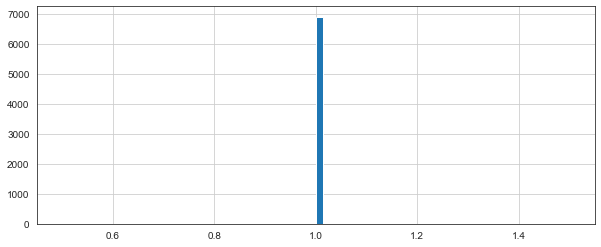

In [8]:
#plot the graph of 'Total Food Amt' column
plt.figure(figsize=(10,4))
calories['Total Food Amt'].hist(bins=70)

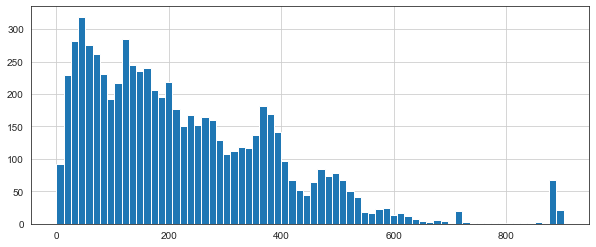

In [9]:
#plot the graph of 'Energy_kcal' column
plt.figure(figsize=(10,4))
calories['Energy_kcal'].hist(bins=70)

In [10]:
#sort the values according to the 'Total Food Amt' colum and put it in pivot
#table
# This one simply arranges FoodGroups and their description in a pivot table
foodgroup = df.pivot_table(index='Descrip',columns='FoodGroup',values='Energy_kcal')
foodgroup.head(10)

FoodGroup,American Indian/Alaska Native Foods,Baby Foods,Baked Products,Beef Products,Beverages,Breakfast Cereals,Cereal Grains and Pasta,Dairy and Egg Products,Fast Foods,Fats and Oils,...,Nut and Seed Products,Pork Products,Poultry Products,Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Spices and Herbs,Sweets,Vegetables and Vegetable Products
Descrip,,,,,,,,,,,,,,,,,,,,,
"APPLEBEE'S, 9 oz house sirloin steak",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,189.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, Double Crunch Shrimp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid's menu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,143.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, chili",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, coleslaw",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, crunchy onion rings",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,356.0,NaN,NaN,NaN,NaN,NaN,NaN
"APPLEBEE'S, mozzarella sticks",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN
"ARCHWAY Home Style Cookies, Chocolate Chip Ice Box",NaN,NaN,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ARCHWAY Home Style Cookies, Coconut Macaroon",NaN,NaN,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Item-based Collaborative Recommender

Uses cosine similarity to generate item ratings

source: [Movie Recommender System](https://github.com/berkurka/MovieRecommender/blob/master/Movie_Recommender.ipynb)

In [11]:
# For this recognition system, the ratings of each food item will be based on its calories
def calorie_based_recommender(data,calorie_amt):
    pivot_item_based = data.pivot_table(index='Descrip',columns='FoodGroup',values='Energy_kcal')
    sparse_pivot = sparse.csr_matrix(pivot_item_based.fillna(0))
    recommended_itm = pw.cosine_similarity(sparse_pivot)
    recommended_df = pd.DataFrame(recommended_itm, columns=pivot_item_based.index, index=pivot_item_based.index)

    cosine_df = pd.DataFrame(recommended_df[calorie_amt].sort_values(ascending=False))
    cosine_df.reset_index(level=0, inplace=True)
    cosine_df.columns = ['Food','Cosine_Sim']
    return cosine_df

In [12]:
def generate_recommendations(data,calorie_amt,top_results):
    print("== Diet Recommendation ==")
    print("Food Description: ", calorie_amt)
    print("Here's a list of recommended food based on the calorie intake you need per 100g of food")

    cos_sim = calorie_based_recommender(data,calorie_amt)
    display(cos_sim[1:top_results+1])

In [13]:
generate_recommendations(df,'Yogurt, fruit, low fat, 9 grams protein per 8 ounce',10)

== Diet Recommendation ==
Food Description:  Yogurt, fruit, low fat, 9 grams protein per 8 ounce
Here's a list of recommended food based on the calorie intake you need per 100g of food


,Food,Cosine_Sim
1,"Milk, nonfat, fluid, with added vitamin A and ...",1.0
2,"Cheese, cottage, lowfat, 1% milkfat",1.0
3,"Cheese, cottage, creamed, with fruit",1.0
4,"Cheese, cottage, creamed, large or small curd",1.0
5,"Cheese, colby",1.0
6,"Cheese, cheddar, sharp, sliced",1.0
7,"Cheese, cheddar, nonfat or fat free",1.0
8,"Cheese, cheddar",1.0
9,"Cream substitute, flavored, liquid",1.0
10,"Cream substitute, flavored, powdered",1.0


We think the reason as to why the cosine similarity results to values of either 1 or 0 only is due to the calorie values being closely related in value and that other products having a significantly different (higher or lower) in value in terms of similarity.

## User-Based Recommendations

In [14]:
FoodGroup = pd.DataFrame(df.groupby('FoodGroup')['Energy_kcal'].mean())
FoodGroup = FoodGroup.sort_values(by=['Energy_kcal'])
FoodGroup

,Energy_kcal
FoodGroup,
Vegetables and Vegetable Products,63.572948
"Soups, Sauces, and Gravies",77.346369
Fruits and Fruit Juices,85.879725
Beverages,115.622490
Finfish and Shellfish Products,135.004525
Baby Foods,155.826367
"Meals, Entrees, and Side Dishes",175.915789
Poultry Products,196.188498
Legumes and Legume Products,202.386885


In [15]:
fg_input = input('Choose a Food Group: ')
food_choices = df.loc[df['FoodGroup'] == fg_input]
food_choices = food_choices.loc[:,'FoodGroup':'Energy_kcal']

In [16]:
food_choices = food_choices.reset_index(drop=True)
food_choices

,FoodGroup,Descrip,Energy_kcal
0,Fast Foods,"Fast foods, english muffin, with cheese and sa...",338.0
1,Fast Foods,"Fast foods, oysters, battered or breaded, and ...",265.0
2,Fast Foods,"DIGIORNO Pizza, cheese topping, rising crust, ...",256.0
3,Fast Foods,"Fast foods, croissant, with egg, cheese, and s...",308.0
4,Fast Foods,"Fast foods, hamburger; single, regular patty; ...",263.0
...,...,...,...
287,Fast Foods,"Fast Foods, Fried Chicken, Wing, meat and skin...",310.0
288,Fast Foods,"McDONALD'S, Egg McMUFFIN",228.0
289,Fast Foods,"Fast foods, burrito, with beef",238.0
290,Fast Foods,"BURGER KING, CROISSAN'WICH with Sausage and Ch...",376.0


In [19]:
food_input = input('Get same calories of: ')
top_recs = input('Recommendation List Size?: ')

generate_recommendations(df,food_input,int(top_recs))

== Diet Recommendation ==
Food Description:  Fast foods, burrito, with beef
Here's a list of recommended food based on the calorie intake you need per 100g of food


,Food,Cosine_Sim
1,"KFC, Fried Chicken, ORIGINAL RECIPE, Wing, mea...",1.0
2,"Fast foods, sundae, hot fudge",1.0
3,"Fast foods, taco salad",1.0
4,"Fast foods, taco salad with chili con carne",1.0
5,"Fast foods, taco with beef, cheese and lettuce...",1.0
6,"Fast foods, tostada, with beans and cheese",1.0
7,"Fast foods, tostada, with beans, beef, and cheese",1.0
8,"Fast foods, tostada, with beef and cheese",1.0
9,"Fast foods, vanilla, light, soft-serve ice cre...",1.0
10,"KFC, biscuit",1.0
